In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import RandomizedSearchCV

from sklearn.svm import SVC
# from sklearn.svm import SVR

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [5]:
heart_df=pd.read_csv("dataset/heart.csv")

In [6]:
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [7]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
heart_df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [11]:
heart.shape

(918, 12)

In [15]:
df_heart=pd.DataFrame(heart)

In [19]:
len=df_heart.isnull().eq(True).sum()

In [20]:
len

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [23]:
df_heart.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [27]:
print("Total Male Members:", df_heart[df_heart["Sex"] == "M"].shape[0])

Total Male Members: 725


In [28]:
print("Total Female Members:", df_heart[df_heart["Sex"] == "F"].shape[0])

Total Female Members: 193


In [36]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [37]:
total_object=df_heart.select_dtypes(include="object")

In [38]:
total_object

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up
...,...,...,...,...,...
913,M,TA,Normal,N,Flat
914,M,ASY,Normal,N,Flat
915,M,ASY,Normal,Y,Flat
916,F,ATA,LVH,N,Flat


In [39]:
total_object.nunique()

Sex               2
ChestPainType     4
RestingECG        3
ExerciseAngina    2
ST_Slope          3
dtype: int64

In [40]:
df_heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [48]:
df_heart['Age'].min()

28

In [49]:
df_heart["Age"].max()

77

In [59]:
df_sorted = df_heart.sort_values(by=["Age"], ascending=True)

In [60]:
df_sorted

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Age Group
208,28,M,ATA,130,132,0,LVH,185,N,0.0,Up,0,25-30
219,29,M,ATA,140,263,0,Normal,170,N,0.0,Up,0,25-30
170,29,M,ATA,120,243,0,Normal,160,N,0.0,Up,0,25-30
829,29,M,ATA,130,204,0,LVH,202,N,0.0,Up,0,25-30
215,30,F,TA,170,237,0,ST,170,N,0.0,Up,0,25-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,75,M,ASY,170,203,1,ST,108,N,0.0,Flat,1,NaN
541,76,M,NAP,104,113,0,LVH,120,N,3.5,Down,1,NaN
688,76,F,NAP,140,197,0,ST,116,N,1.1,Flat,0,NaN
814,77,M,ASY,125,304,0,LVH,162,Y,0.0,Up,1,NaN


In [62]:
df_sorted['Age'].unique()

array([28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
       45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61,
       62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77],
      dtype=int64)

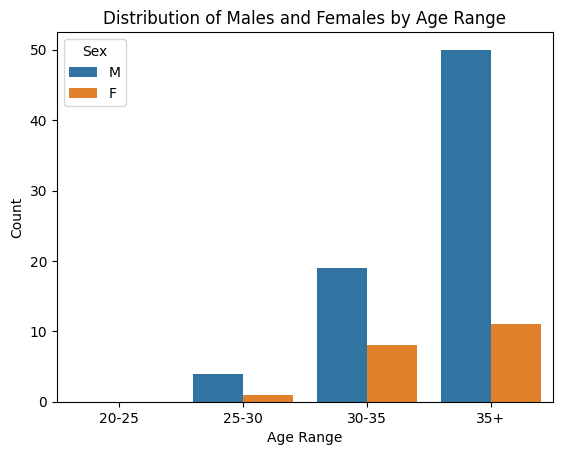

In [65]:
bins = [20, 25, 30, 35, 40]
labels = ["20-25", "25-30", "30-35", "35+"]
df_heart["Age Group"] = pd.cut(df_heart["Age"], bins=bins, labels=labels)

# Seaborn count plot
sns.countplot(x="Age Group", hue="Sex", data=df_heart)
plt.xlabel("Age Range")
plt.ylabel("Count")
plt.title("Distribution of Males and Females by Age Range")
plt.show()


In [70]:
bins=df_heart['Age']

ValueError: `bins` must increase monotonically, when an array

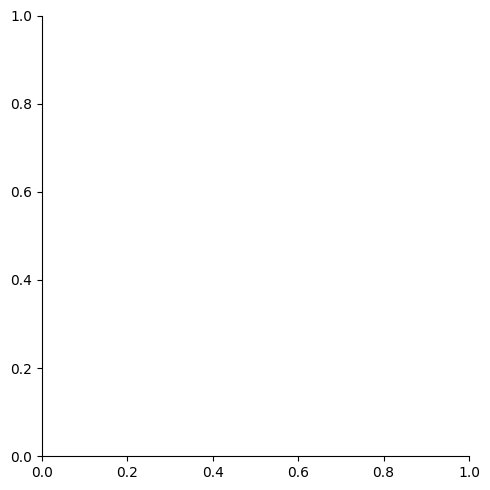

In [71]:
sns.displot(data=df_heart, x="Age", hue="Sex", kind="hist", bins=bins, multiple="stack")
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Distribution of Ages for Males and Females")
plt.show()